In [55]:
require(ISLR2)
require(glmnet)

In [56]:
x = model.matrix(Salary ~ .-1, data = Hitters)

In [57]:
Hitters = na.omit(Hitters)

In [58]:
y = Hitters$Salary

In [59]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueA,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,1,282,421,25,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,0,1,0,76,127,7,0
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,1,0,1,121,283,9,0
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,0,1,1,143,290,19,1
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,1,0,0,0,0,0,0
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,1,0,0,238,445,22,0


In [60]:
y

[1]  475.000  480.000  500.000   91.500  750.000   70.000  100.000   75.000
  [9] 1100.000  517.143  512.500  550.000  700.000  240.000  775.000  175.000
 [17]  135.000  100.000  115.000  600.000  776.667  765.000  708.333  750.000
 [25]  625.000  900.000  110.000  612.500  300.000  850.000   90.000   67.500
 [33]  180.000  305.000  215.000  247.500  815.000  875.000   70.000 1200.000
 [41]  675.000  415.000  340.000  416.667 1350.000   90.000  275.000  230.000
 [49]  225.000  950.000   75.000  105.000  320.000  850.000  535.000  933.333
 [57]  850.000  210.000  325.000  275.000  450.000 1975.000 1900.000  600.000
 [65] 1041.667  110.000  260.000  475.000  431.500 1220.000   70.000  145.000
 [73]  595.000 1861.460  300.000  490.000 2460.000  375.000  750.000 1175.000
 [81]   70.000 1500.000  385.000 1925.571  215.000  900.000  155.000  700.000
 [89]  535.000  362.500  733.333  200.000  400.000  400.000  737.500  500.000
 [97]  600.000  662.500  950.000  750.000  297.500  325.000   87.500  175.000
[105]   90.000 1237.500  430.000  100.000  165.000  250.000 1300.000  773.333
[113] 1008.333  275.000  775.000  850.000  365.000   95.000  110.000  100.000
[121]  277.500   80.000  600.000  200.000  657.000   75.000 2412.500  250.000
[129]  155.000  640.000  300.000  110.000  825.000  195.000  450.000  630.000
[137]   86.500 1300.000 1000.000 1800.000 1310.000  737.500  625.000  125.000
[145] 1043.333  725.000  300.000  365.000   75.000 1183.333  202.500  225.000
[153]  525.000  265.000  787.500  800.000  587.500  145.000  420.000   75.000
[161]  575.000  780.000   90.000  150.000  700.000  550.000  650.000   68.000
[169]  100.000  670.000  175.000  137.000 2127.333  875.000  120.000  140.000
[177]  210.000  800.000  240.000  350.000  175.000  200.000 1940.000  700.000
[185]  750.000  450.000  172.000 1260.000  750.000  190.000  580.000  130.000
[193]  450.000  300.000  250.000 1050.000  215.000  400.000  560.000 1670.000
[201]  487.500  425.000  500.000  250.000  400.000  450.000  750.000   70.000
[209]  875.000  190.000  191.000  740.000  250.000  140.000   97.500  740.000
[217]  140.000  341.667 1000.000  100.000   90.000  200.000  135.000  155.000
[225]  475.000 1450.000  150.000  105.000  350.000   90.000  530.000  341.667
[233]  940.000  350.000  326.667  250.000  740.000  425.000  925.000  185.000
[241]  920.000  286.667  245.000  235.000 1150.000  160.000  425.000  900.000
[249]  500.000  277.500  750.000  160.000 1300.000  525.000  550.000 1600.000
[257]  120.000  165.000  700.000  875.000  385.000  960.000 1000.000

In [61]:
fit_ridge = glmnet(x,y, alpha = 0)

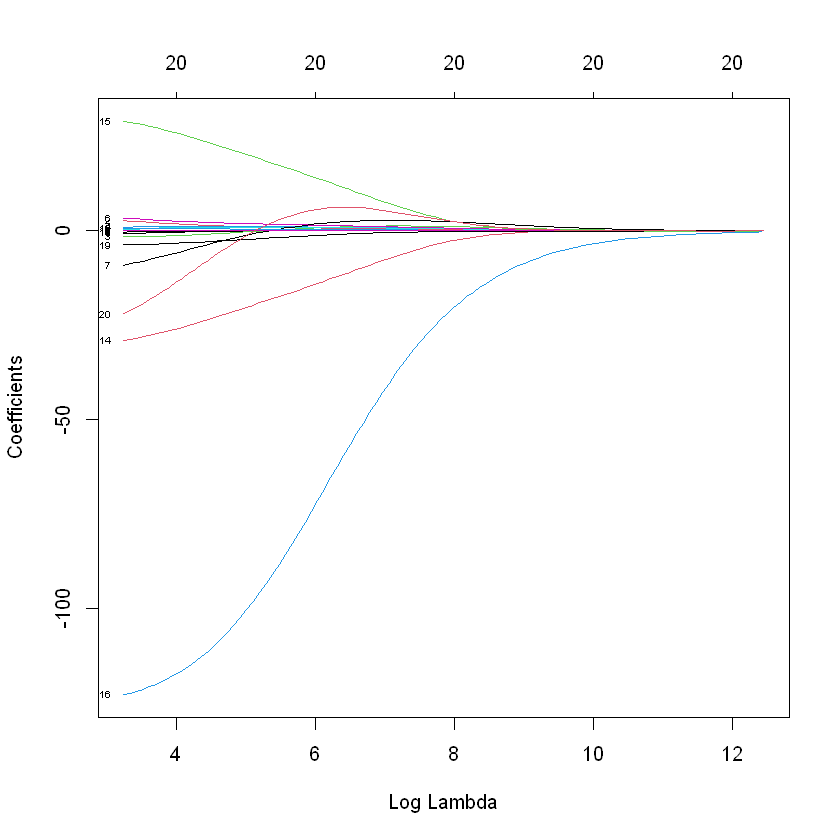

In [62]:
plot(fit_ridge, xvar = 'lambda', label = TRUE)

In [63]:
cv_ridge = cv.glmnet(x, y, alpha = 0)

In [64]:
cv_ridge


Call:  cv.glmnet(x = x, y = y, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min   25.5   100  115980 19375      20
1se 2220.3    52  134161 21749      20

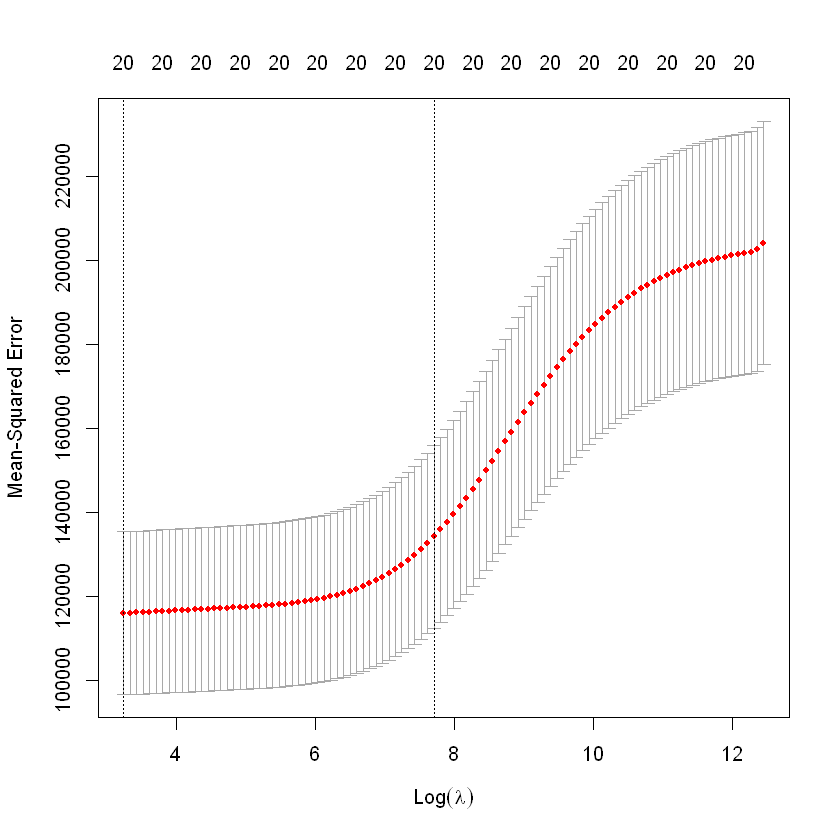

In [65]:
plot(cv_ridge)

In [66]:
fit_lasso = glmnet(x, y)

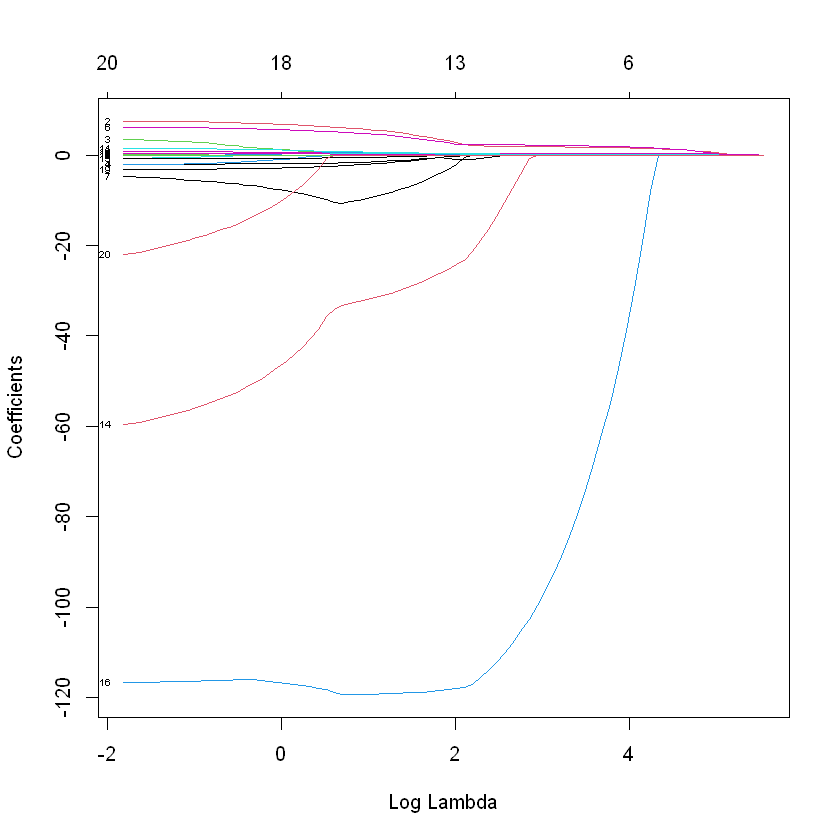

In [67]:
plot(fit_lasso, xvar = "lambda", label = TRUE)

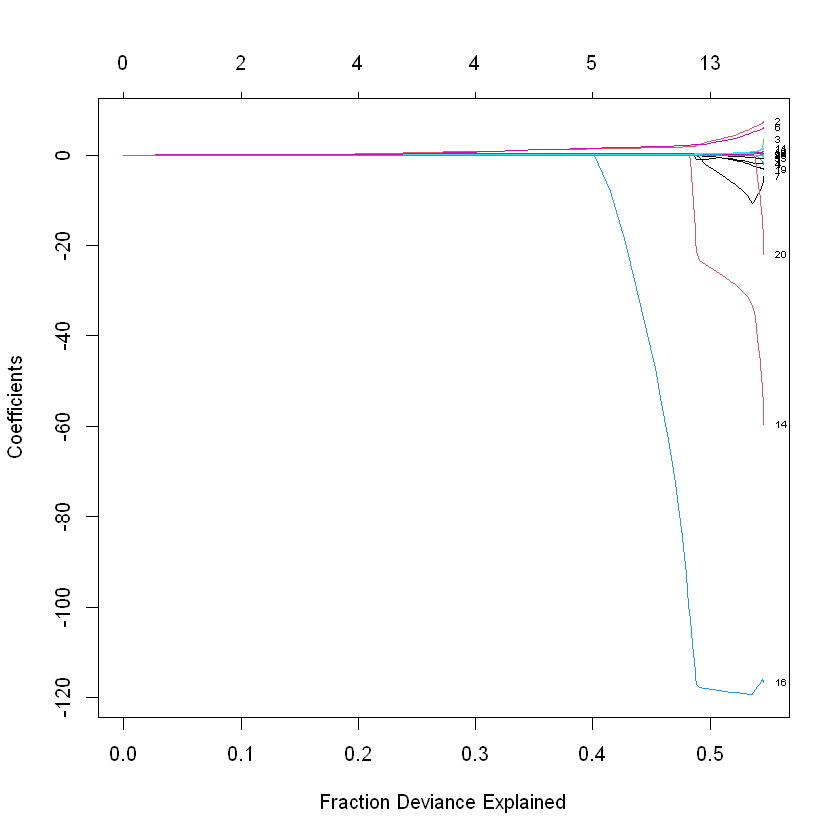

In [68]:
plot(fit_lasso, xvar = "dev", label = TRUE)

In [69]:
cv_lasso = cv.glmnet(x, y)

In [89]:
cv_lasso


Call:  cv.glmnet(x = x, y = y) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min   2.94    49  113060 19883      14
1se  83.59    13  132179 20596       5

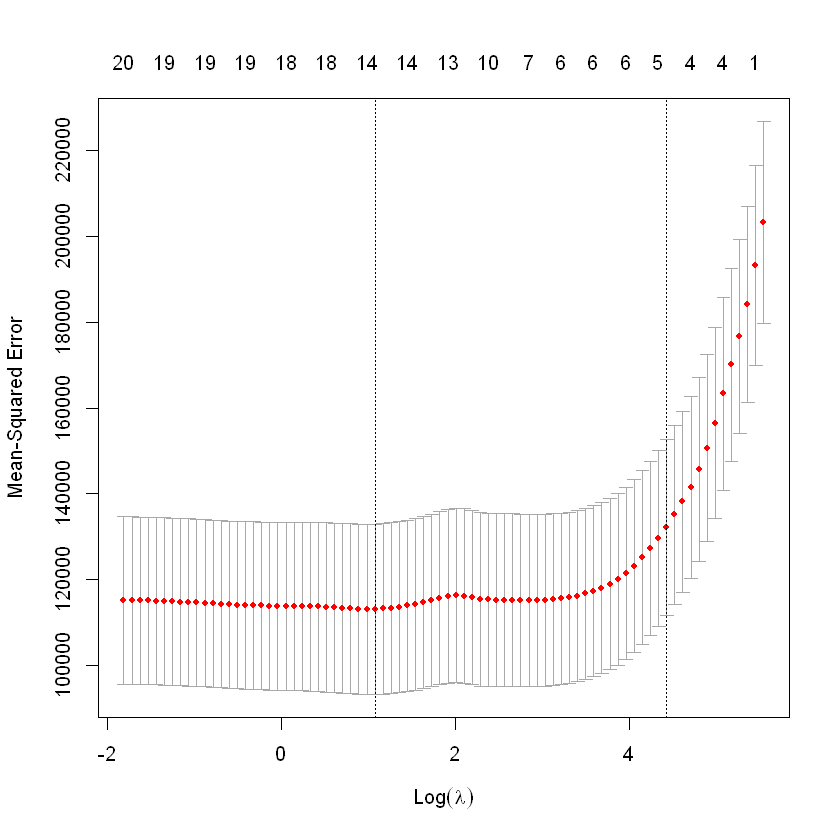

In [70]:
plot(cv_lasso)

In [71]:
coef(cv_lasso)

21 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 167.91202818
AtBat         .         
Hits          1.29269756
HmRun         .         
Runs          .         
RBI           .         
Walks         1.39817511
Years         .         
CAtBat        .         
CHits         .         
CHmRun        .         
CRuns         0.14167760
CRBI          0.32192558
CWalks        .         
LeagueA       .         
LeagueN       .         
DivisionW     .         
PutOuts       0.04675463
Assists       .         
Errors        .         
NewLeagueN    .         

In [72]:
dim(Hitters)

[1] 263  20

In [73]:
train = sample(263, 180, replace = FALSE)

In [74]:
lasso_tr = glmnet(x[train,], y[train])

In [75]:
lasso_tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df  %Dev  Lambda
1   0  0.00 265.300
2   1  5.76 241.700
3   1 10.55 220.300
4   2 14.73 200.700
5   4 19.86 182.900
6   5 24.48 166.600
7   4 28.33 151.800
8   4 31.53 138.300
9   5 34.25 126.000
10  5 36.55 114.800
11  6 38.97 104.600
12  6 40.96  95.350
13  6 42.62  86.880
14  6 43.99  79.160
15  6 45.14  72.130
16  6 46.09  65.720
17  5 46.88  59.880
18  7 47.76  54.560
19  7 48.51  49.710
20  7 49.14  45.300
21  7 49.66  41.270
22  7 50.09  37.610
23  7 50.45  34.270
24  7 50.75  31.220
25  7 50.99  28.450
26  7 51.20  25.920
27  7 51.37  23.620
28  8 51.54  21.520
29  8 51.71  19.610
30  8 51.85  17.870
31  8 51.97  16.280
32  8 52.06  14.830
33  8 52.14  13.520
34  8 52.21  12.310
35  8 52.27  11.220
36  8 52.31  10.220
37 10 52.54   9.316
38 10 53.05   8.488
39 11 53.56   7.734
40 12 54.11   7.047
41 12 54.58   6.421
42 13 54.98   5.851
43 13 55.52   5.331
44 13 55.96   4.857
45 13 56.32   4.426
46 13 56.63   4.033
47 13 56.88  

In [76]:
pred = predict(lasso_tr, x[-train,])

In [77]:
dim(pred)

[1] 83 91

In [78]:
pred

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,⋯,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90
-Alan Ashby,564.8654,560.9954,557.4692,554.1560,547.5529,538.5029,530.1068,522.4640,516.1203,510.4196,⋯,314.90383,314.4678,314.08092,313.7102,313.38731,313.09164,312.82365,312.58195,312.34809,312.14182
-Andres Galarraga,564.8654,540.6018,518.4936,498.1065,477.0340,457.1197,439.1265,422.7396,408.3110,395.2621,⋯,587.36989,587.4730,587.56914,587.6526,587.73083,587.80245,587.86777,587.92761,587.98021,588.02766
-Argenis Salazar,564.8654,540.0788,517.4943,494.8688,461.3574,431.0630,403.0328,377.4780,355.1982,335.3868,⋯,78.16979,78.2651,78.35065,78.4314,78.50505,78.57073,78.63012,78.68372,78.73412,78.78118
-Andres Thomas,564.8654,539.4065,516.2094,493.1235,460.5660,432.2110,406.2027,382.4936,362.0233,343.8998,⋯,140.80891,141.0576,141.27425,141.4896,141.67291,141.84024,141.99193,142.12820,142.26409,142.38401
-Alex Trevino,564.8654,551.3588,539.0522,527.0584,506.7665,483.8829,463.0669,444.1209,425.6797,408.1371,⋯,219.08427,218.8310,218.60315,218.3906,218.20182,218.02853,217.87147,217.72949,217.59542,217.47687
-Alan Wiggins,564.8654,560.0990,555.7560,550.3793,533.2237,513.3766,494.2467,476.8019,459.1286,442.3708,⋯,378.61539,378.7042,378.78540,378.8589,378.92520,378.98631,379.04191,379.09254,379.13903,379.18013
-Buddy Bell,564.8654,615.0797,660.8331,703.6014,750.1897,792.5823,830.7507,865.5141,894.9413,921.0402,⋯,1082.18470,1082.0856,1082.00277,1081.9120,1081.83591,1081.76928,1081.70881,1081.65480,1081.59806,1081.54413
-Bobby Bonilla,564.8654,541.1247,519.4930,502.0559,498.4338,491.7589,485.1850,479.1936,474.1282,469.6329,⋯,341.34439,340.9248,340.55535,340.1959,339.88714,339.60382,339.34624,339.11383,338.88693,338.68710
-Bob Dernier,564.8654,558.7543,553.1862,546.7306,530.2347,512.5743,495.5152,479.9525,464.7365,450.5738,⋯,312.05511,312.0627,312.06853,312.0762,312.08181,312.08717,312.09177,312.09554,312.10053,312.10462
-Bill Doran,564.8654,563.0871,561.4667,563.1530,584.8041,601.2048,614.0214,625.6462,636.7949,647.6454,⋯,658.86004,658.8678,658.87296,658.8799,658.88165,658.88530,658.88874,658.89167,658.89644,658.89764


In [79]:
rmse = sqrt(apply((y[-train] - pred)^2, 2, mean))

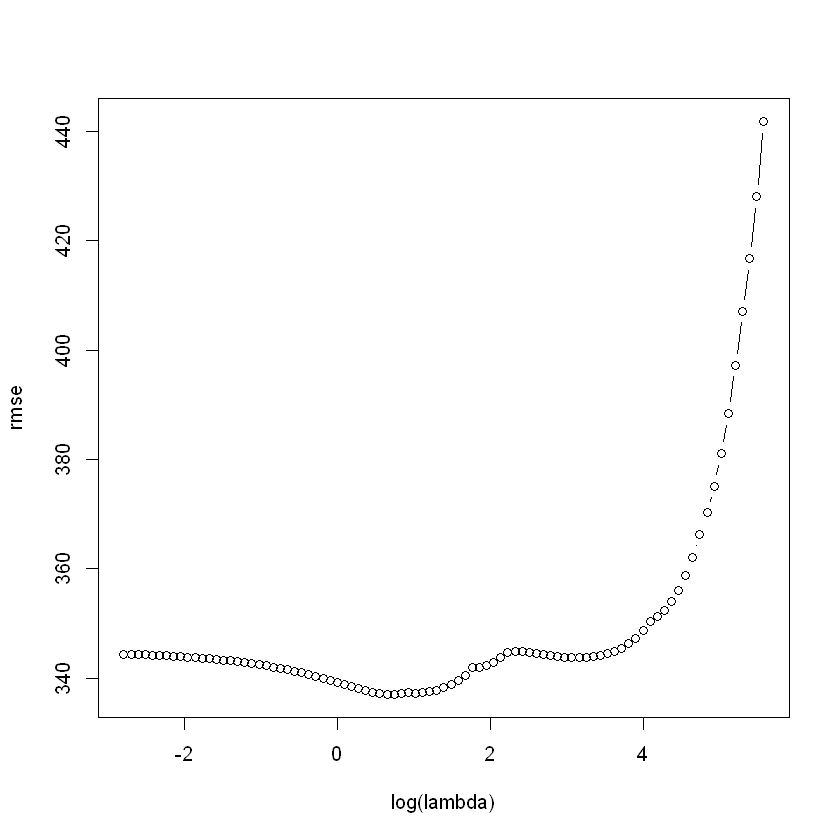

In [80]:
plot(log(lasso_tr$lambda), rmse, type = 'b', xlab = 'log(lambda)')

In [81]:
lam_best = lasso_tr$lambda[order(rmse)[1]]

In [87]:
lasso_tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df  %Dev  Lambda
1   0  0.00 265.300
2   1  5.76 241.700
3   1 10.55 220.300
4   2 14.73 200.700
5   4 19.86 182.900
6   5 24.48 166.600
7   4 28.33 151.800
8   4 31.53 138.300
9   5 34.25 126.000
10  5 36.55 114.800
11  6 38.97 104.600
12  6 40.96  95.350
13  6 42.62  86.880
14  6 43.99  79.160
15  6 45.14  72.130
16  6 46.09  65.720
17  5 46.88  59.880
18  7 47.76  54.560
19  7 48.51  49.710
20  7 49.14  45.300
21  7 49.66  41.270
22  7 50.09  37.610
23  7 50.45  34.270
24  7 50.75  31.220
25  7 50.99  28.450
26  7 51.20  25.920
27  7 51.37  23.620
28  8 51.54  21.520
29  8 51.71  19.610
30  8 51.85  17.870
31  8 51.97  16.280
32  8 52.06  14.830
33  8 52.14  13.520
34  8 52.21  12.310
35  8 52.27  11.220
36  8 52.31  10.220
37 10 52.54   9.316
38 10 53.05   8.488
39 11 53.56   7.734
40 12 54.11   7.047
41 12 54.58   6.421
42 13 54.98   5.851
43 13 55.52   5.331
44 13 55.96   4.857
45 13 56.32   4.426
46 13 56.63   4.033
47 13 56.88  

In [88]:
lam_best

[1] 1.915777

In [83]:
coef(lasso_tr, s=lam_best)

21 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) 199.984675035
AtBat        -2.080578093
Hits          6.821028195
HmRun         4.708614806
Runs         -0.392458947
RBI           .          
Walks         4.903057380
Years       -11.784771093
CAtBat       -0.051804201
CHits         0.005755785
CHmRun        0.536668096
CRuns         1.228074854
CRBI          0.160903872
CWalks       -0.498874113
LeagueA     -27.247719442
LeagueN       .          
DivisionW   -85.127437843
PutOuts       0.324694733
Assists       0.327032514
Errors       -4.905226544
NewLeagueN    .          

In [91]:
?cv.glmnet()

cv.glmnet                package:glmnet                R Documentation

_C_r_o_s_s-_v_a_l_i_d_a_t_i_o_n _f_o_r _g_l_m_n_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     Does k-fold cross-validation for glmnet, produces a plot, and
     returns a value for 'lambda' (and 'gamma' if 'relax=TRUE')

_U_s_a_g_e:

     cv.glmnet(
       x,
       y,
       weights = NULL,
       offset = NULL,
       lambda = NULL,
       type.measure = c("default", "mse", "deviance", "class", "auc", "mae", "C"),
       nfolds = 10,
       foldid = NULL,
       alignment = c("lambda", "fraction"),
       grouped = TRUE,
       keep = FALSE,
       parallel = FALSE,
       gamma = c(0, 0.25, 0.5, 0.75, 1),
       relax = FALSE,
       trace.it = 0,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

       x: 'x' matrix as in 'glmnet'.

       y: response 'y' as in 'glmnet'.

 weights: Observation weights; defaults to 1 per observation

  offset: Offset vector (matrix) as in 'glmnet